In [1]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("udemy_courses.csv", parse_dates=['published_timestamp'])
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance


In [8]:
df.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

### Convert a certain column to date type....pass the column in read_csv column with parse_dates=['column']

In [10]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [11]:
df.shape

(3678, 12)

In [12]:
print("Number or Rows: ", df.shape[0])
print("Number or Columns: ", df.shape[1])

Number or Rows:  3678
Number or Columns:  12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

# Check Null values

In [16]:
print("Any Missing Value? ", df.isnull().values.any())

Any Missing Value?  False


In [15]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<AxesSubplot:>

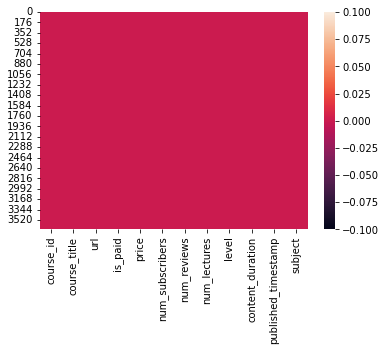

In [17]:
sns.heatmap(df.isnull())

# Check for duplicate data and drop it

In [18]:
duplicates = df.duplicated().any()
print("Are there duplicate values in our data? ", duplicates)

Are there duplicate values in our data?  True


In [19]:
df = df.drop_duplicates()

In [20]:
duplicates = df.duplicated().any()
print("Are there duplicate values in our data? ", duplicates)

Are there duplicate values in our data?  False


# Number of courses per subject

In [21]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [22]:
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


#### value_counts() returns a series containing the count of unique values

In [24]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [26]:
import matplotlib.pyplot as plt

### countplot() is used to show the counts of observations in each categorical beam

C:\Users\derro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


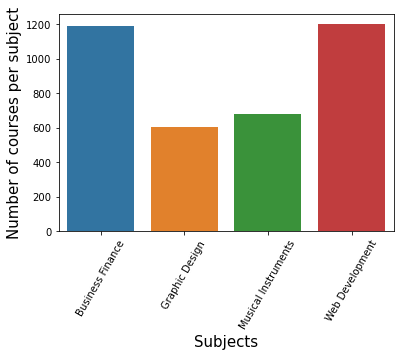

In [31]:
sns.countplot(df['subject'])
plt.xlabel("Subjects", fontsize=15)
plt.ylabel("Number of courses per subject", fontsize=15)
plt.xticks(rotation=60)
plt.show()

# Levels in the udemy courses

In [32]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [33]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

C:\Users\derro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


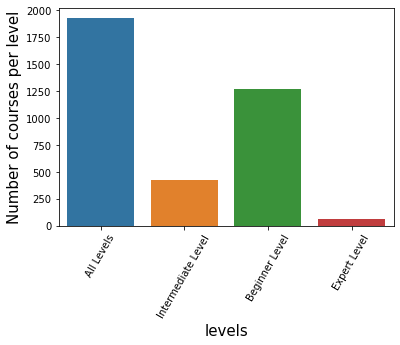

In [34]:
sns.countplot(df['level'])
plt.xlabel("levels", fontsize=15)
plt.ylabel("Number of courses per level", fontsize=15)
plt.xticks(rotation=60)
plt.show()

# Count of Paid and Free courses

In [35]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [37]:
df['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

C:\Users\derro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


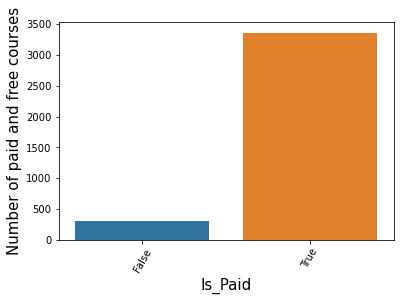

In [40]:
sns.countplot(df['is_paid'])
plt.xlabel("Is_Paid", fontsize=15)
plt.ylabel("Number of paid and free courses", fontsize=15)
plt.xticks(rotation=60)
plt.show()

# Between paid and free, which has got more lectures?

In [42]:
df.groupby(['is_paid']).mean()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


# Which courses have higher subscribers free or paid?

<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

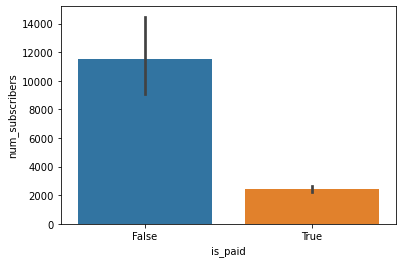

In [44]:
sns.barplot(x='is_paid', y='num_subscribers', data=df)

# Level with highest subscribers

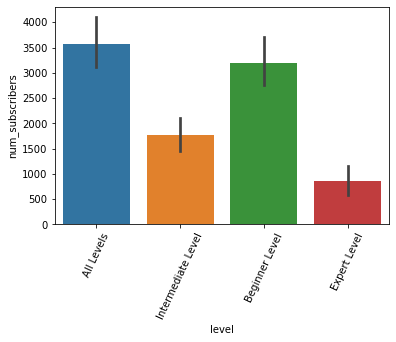

In [46]:
sns.barplot(x='level', y='num_subscribers', data=df)
plt.xticks(rotation=65)
plt.show()

# Most popular course title

In [47]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [52]:
df[df['num_subscribers'].max()==df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

# 10 most popular courses as per number of subscribers

In [56]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [60]:
top_10 = df.sort_values(by='num_subscribers', ascending=False).head(10)

<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

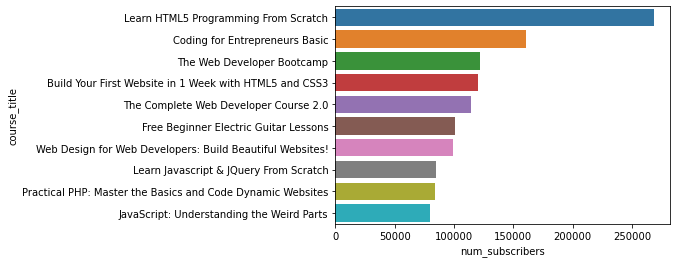

In [61]:
sns.barplot(x="num_subscribers", y="course_title", data=top_10)

# Course with highest number of reviews

In [62]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [68]:
df[df['num_reviews'].max()==df['num_reviews']]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development


<AxesSubplot:xlabel='subject', ylabel='num_reviews'>

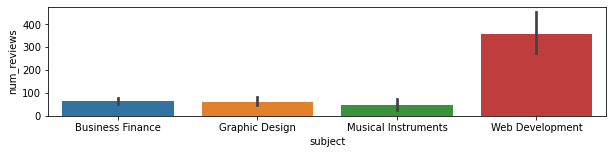

In [72]:
plt.figure(figsize=(10,2))
sns.barplot(x="subject", y="num_reviews", data=df)


# Does price affect number of reviews?

<AxesSubplot:xlabel='price', ylabel='num_reviews'>

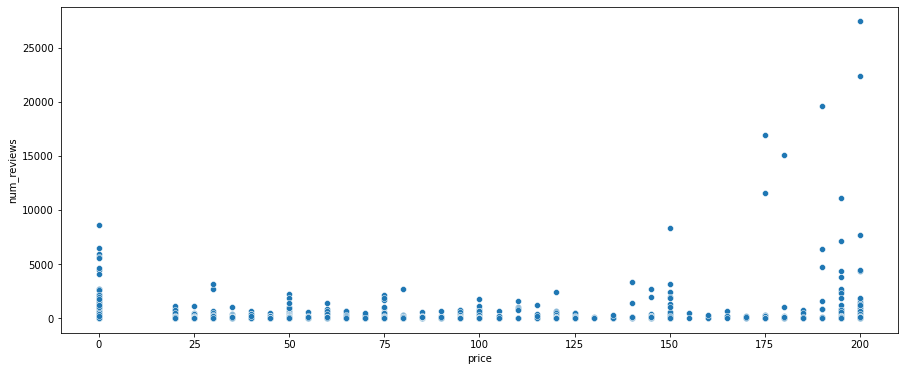

In [73]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="price", y="num_reviews", data=df)

# Number of courses related to Python

In [74]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [82]:
len(df[df['course_title'].str.contains("python", case=False)])

29

# 10 most popular python courses as per number of subscribers

In [85]:
df[df['course_title'].str.contains("python", case=False)].sort_values(by="num_subscribers", ascending=False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


<AxesSubplot:xlabel='num_subscribers', ylabel='course_title'>

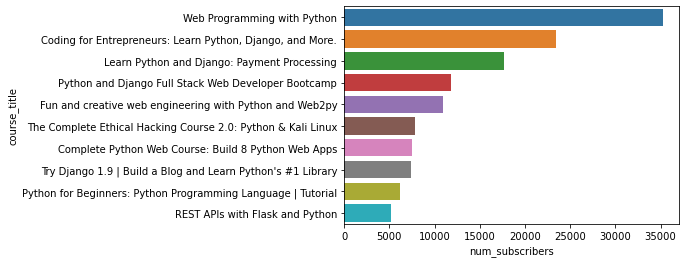

In [86]:
python = df[df['course_title'].str.contains("python", case=False)].sort_values(by="num_subscribers", ascending=False).head(10)
sns.barplot(x='num_subscribers', y='course_title', data=python)

# year the highest number of courses were posted

In [87]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [91]:
df['year'] = df['published_timestamp'].dt.year

In [92]:
df.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017


C:\Users\derro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

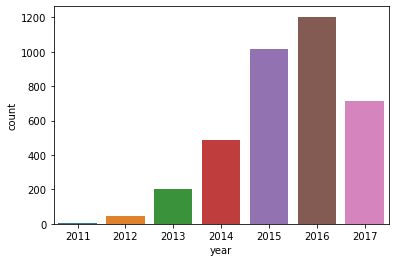

In [93]:
sns.countplot('year', data=df)

# Category per year

In [94]:
df.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64